<b>Lección 1: ANÁLISIS EXPLORATORIO DE DATOS</b>    
<font color="red">Comprender el propósito del EDA y diferenciarlo del análisis inicial</font>


<b>Genero un dataset atingente al caso</b>  
Variables Incluidas:           
<u>Numéricas</u>           
•	edad    
•	visitas_web         
•	tiempo_en_web_min                
•	numero_compras          
•	monto_total_compras         
•	descuento_promedio          
•	numero_devoluciones         
•	puntuacion_resena           
<u>Categóricas</u>        
•	genero      
•	region      
•	tipo_cliente (Nuevo, Recurrente, Premium)           
•	categoria_favorita          
•	metodo_pago     


| Variable | Tipo                            |
| -------- | ---------------------           |
| edad               | Cuantitativa discreta |
| visitas_web        | Cuantitativa discreta |
| tiempo_en_web_min  | Cuantitativa continua |
| numero_compras     | Cuantitativa discreta |
| monto_total_compras| Cuantitativa continua |
| descuento_promedio | Cuantitativa continua |
| numero_devoluciones| Cuantitativa discreta |
| puntuacion_resena  | Cuantitativa discreta |
| genero             | Categórica nominal    |
| region             | Categórica nominal    |
| tipo_cliente       | Categórica ordinal    |
| categoria_favorita | Categórica nominal    |
| metodo_pago        | Categórica nominal    |

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(42)

n = 2000

# Variables categóricas
genero = np.random.choice(["Femenino", "Masculino", "Otro"], n, p=[0.5, 0.48, 0.02])
region = np.random.choice(["Norte", "Centro", "Sur"], n, p=[0.3, 0.5, 0.2])
tipo_cliente = np.random.choice(["Nuevo", "Recurrente", "Premium"], n, p=[0.4, 0.45, 0.15])
categoria_favorita = np.random.choice(
    ["Tecnología", "Moda", "Hogar", "Deportes", "Belleza"], n
)
metodo_pago = np.random.choice(
    ["Tarjeta Crédito", "Tarjeta Débito", "Transferencia", "PayPal"], n
)

# Variables numéricas base
edad = np.random.normal(35, 12, n).astype(int)
visitas_web = np.random.poisson(15, n)
tiempo_en_web_min = np.random.normal(20, 8, n)
tiempo_en_web_min = np.clip(tiempo_en_web_min, 1, None)
numero_compras = np.random.poisson(5, n) + 1


# Relación estratégica: más compras = mayor monto
monto_unitario = np.random.lognormal(mean=10, sigma=0.3, size=n)
monto_total_compras = numero_compras * monto_unitario

descuento_promedio = np.random.uniform(0, 30, n)
numero_devoluciones = np.random.binomial(numero_compras, 0.1)
puntuacion_resena = np.random.choice([1,2,3,4,5], n, p=[0.05, 0.10, 0.20, 0.40, 0.25])

# Crear DataFrame
df = pd.DataFrame({
    "edad": edad,
    "genero": genero,
    "region": region,
    "tipo_cliente": tipo_cliente,
    "categoria_favorita": categoria_favorita,
    "metodo_pago": metodo_pago,
    "visitas_web": visitas_web,
    "tiempo_en_web_min": tiempo_en_web_min,
    "numero_compras": numero_compras,
    "monto_total_compras": monto_total_compras,
    "descuento_promedio": descuento_promedio,
    "numero_devoluciones": numero_devoluciones,
    "puntuacion_resena": puntuacion_resena
})

# -------------------------
# ENSUCIADO INTENCIONAL (IDA)
# -------------------------

# Valores faltantes
df.loc[np.random.choice(df.index, 38), "monto_total_compras"] = np.nan
df.loc[np.random.choice(df.index, 30), "puntuacion_resena"] = np.nan

# Edades negativas (inconsistencia)
df.loc[np.random.choice(df.index, 5), "edad"] = -5

# Puntuaciones fuera de rango
df.loc[np.random.choice(df.index, 5), "puntuacion_resena"] = 6

# Devoluciones mayores a compras (error lógico)
df.loc[np.random.choice(df.index, 5), "numero_devoluciones"] = 20

df.head()


,edad,genero,region,tipo_cliente,categoria_favorita,metodo_pago,visitas_web,tiempo_en_web_min,numero_compras,monto_total_compras,descuento_promedio,numero_devoluciones,puntuacion_resena
0,44,Femenino,Norte,Recurrente,Tecnología,Tarjeta Débito,12,32.76,7,193815.77,9.38,1,4.00
1,32,Masculino,Norte,Recurrente,Tecnología,Tarjeta Crédito,17,11.88,2,70384.57,2.83,0,2.00
2,38,Masculino,Sur,Recurrente,Hogar,Transferencia,16,18.18,4,102987.70,17.54,0,3.00
3,55,Masculino,Norte,Nuevo,Belleza,Tarjeta Crédito,22,20.76,5,119672.23,29.81,0,5.00
4,9,Femenino,Norte,Nuevo,Belleza,Transferencia,18,12.32,5,96331.38,16.79,0,5.00


In [55]:
df.shape

(2000, 13)

In [56]:
pd.set_option('display.float_format', '{:.2f}'.format)

El dataset se conforma por 2000 filas y 13 columnas

Realizo una comprensión general del dataset para entender su estructura, tipos de datos y posibles problemas. Número de registros, cantidad de variables, tipos de datos y presencia de nulos Esto me ayudará a planificar las siguientes etapas de limpieza y análisis.

In [57]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   edad                 2000 non-null   int64  
 1   genero               2000 non-null   object 
 2   region               2000 non-null   object 
 3   tipo_cliente         2000 non-null   object 
 4   categoria_favorita   2000 non-null   object 
 5   metodo_pago          2000 non-null   object 
 6   visitas_web          2000 non-null   int32  
 7   tiempo_en_web_min    2000 non-null   float64
 8   numero_compras       2000 non-null   int32  
 9   monto_total_compras  1963 non-null   float64
 10  descuento_promedio   2000 non-null   float64
 11  numero_devoluciones  2000 non-null   int32  
 12  puntuacion_resena    1970 non-null   float64
dtypes: float64(4), int32(3), int64(1), object(5)
memory usage: 179.8+ KB


,edad,visitas_web,tiempo_en_web_min,numero_compras,monto_total_compras,descuento_promedio,numero_devoluciones,puntuacion_resena
count,2000.00,2000.00,2000.00,2000.00,1963.00,2000.00,2000.00,1970.00
mean,34.60,14.99,20.26,6.04,138801.12,14.91,0.64,3.69
std,12.70,3.91,8.12,2.22,66653.50,8.55,1.23,1.12
min,-11.00,3.00,1.00,1.00,19186.88,0.00,0.00,1.00
25%,26.00,12.00,14.60,4.00,91158.54,7.42,0.00,3.00
50%,34.00,15.00,20.32,6.00,127204.94,15.07,0.00,4.00
75%,43.00,18.00,25.79,7.00,174624.65,22.09,1.00,4.00
max,77.00,30.00,47.43,15.00,433878.83,29.99,20.00,6.00


In [58]:
df.isnull().sum()


edad                    0
genero                  0
region                  0
tipo_cliente            0
categoria_favorita      0
metodo_pago             0
visitas_web             0
tiempo_en_web_min       0
numero_compras          0
monto_total_compras    37
descuento_promedio      0
numero_devoluciones     0
puntuacion_resena      30
dtype: int64

<b>Se realiza el Análisis Inicial de los Dato (IDA)</b>

Verifico los nulos de la variable monto_total_compras

In [59]:
df[df["monto_total_compras"].isnull()]

,edad,genero,region,tipo_cliente,categoria_favorita,metodo_pago,visitas_web,tiempo_en_web_min,numero_compras,monto_total_compras,descuento_promedio,numero_devoluciones,puntuacion_resena
74,39,Masculino,Sur,Recurrente,Tecnología,Tarjeta Crédito,17,9.81,11,NaN,21.66,3,4.00
216,38,Femenino,Sur,Nuevo,Tecnología,PayPal,13,6.06,7,NaN,23.73,1,3.00
290,46,Femenino,Centro,Recurrente,Deportes,Tarjeta Débito,20,16.39,6,NaN,18.59,0,5.00
316,44,Femenino,Norte,Recurrente,Hogar,Tarjeta Débito,15,33.96,8,NaN,24.72,1,5.00
341,33,Femenino,Norte,Nuevo,Deportes,PayPal,29,28.72,7,NaN,19.87,1,5.00
376,27,Masculino,Centro,Nuevo,Tecnología,Transferencia,16,18.40,6,NaN,25.93,1,4.00
448,19,Femenino,Norte,Nuevo,Tecnología,PayPal,22,30.35,4,NaN,1.30,0,4.00
531,27,Otro,Sur,Nuevo,Deportes,Tarjeta Débito,19,13.96,6,NaN,3.19,3,3.00
543,39,Masculino,Centro,Nuevo,Tecnología,Tarjeta Débito,10,18.60,9,NaN,20.14,1,3.00
632,19,Masculino,Norte,Recurrente,Belleza,PayPal,11,22.78,6,NaN,5.59,0,4.00


Atendido que monto_total_compras es una de las variables principales del negocio ya que está directamente relacionada con los ingresos de la empresa, se considera una variable clave, por lo que imputarla podría distorsionar el análisis financiero a posteriori. Por lo que, considerando que el monto_total_compras representa la variable central del análisis y el porcentaje de valores faltantes fue bajo (1.85%), se optó por eliminar dichos registros para evitar sesgos en las estimaciones.               
<b>ANÁLISIS:</b> La variable monto_total_compras representa la métrica central del análisis, ya que constituye el indicador directo de ingresos. La imputación de valores faltantes podría introducir sesgos significativos, especialmente en análisis de correlación y regresión, alterando la estimación de coeficientes y medidas de dispersión.
Dado que el porcentaje de valores faltantes fue bajo, se optó por eliminar estos registros bajo el supuesto de que la pérdida de información no compromete la representatividad del dataset. Asimismo, se consideraron otras alternativas como: imputación por media o mediana, imputación mediante modelos predictivos, crear categoría “sin registro”.
Igualmente se encuentran limitaciones, por ejemplo, si los datos faltantes no fueran aleatorios (por ejemplo, clientes que abandonaron compra), su eliminación podría generar sesgo de selección.
Sin embargo se decidió disminuir el impacto: La eliminación redujo ligeramente el tamaño muestral, pero mejoró la consistencia de métricas financieras y la estabilidad del modelo de regresión.


In [60]:
df = df.dropna(subset=["monto_total_compras"])
df[df["monto_total_compras"].isnull()]

,edad,genero,region,tipo_cliente,categoria_favorita,metodo_pago,visitas_web,tiempo_en_web_min,numero_compras,monto_total_compras,descuento_promedio,numero_devoluciones,puntuacion_resena


También se observa que existen valores nulos en la variable puntuacion_resena. Atendido su carácter ordinal,bajo porcentaje de ausencia (1.5%) y que afecta análisis de satisfacción, pero no es variable principal. Se decide imputar valores faltantes utilizando la mediana, ya que la mediana es robusta ante outliers.         
<b>ANÁLISIS:</b> Al tratarse de una variable ordinal acotada (1–5), la mediana es una medida robusta ante valores extremos y conserva mejor la distribución que la media. Dado que el porcentaje de ausencia fue bajo, la imputación no altera significativamente la estructura de la variable. También en el análisis de la decisión se consideraron alternativas como: eliminar registros, imputación por moda, crear categoría “sin reseña”. Considerando que existen limitaciones como que la imputación reduce la variabilidad real y puede subestimar dispersión en análisis posteriores.
La decisión tomada reduce el impacto, ya que, se mantuvo el tamaño muestral sin distorsionar la distribución general.


In [61]:
df["puntuacion_resena"].fillna(df["puntuacion_resena"].median(), inplace=True)
df[df["puntuacion_resena"].isnull()]

,edad,genero,region,tipo_cliente,categoria_favorita,metodo_pago,visitas_web,tiempo_en_web_min,numero_compras,monto_total_compras,descuento_promedio,numero_devoluciones,puntuacion_resena


Por otra parte, realizando el IDA, especificamente analizando la estadística descriptiva, se advierte que hay edades negativas, lo cual es un error, porque puede distorsionar medias y el análisis demográfico. Se imprimen los datos que cumplen esta condición.

In [62]:
df[df["edad"] < 0]

,edad,genero,region,tipo_cliente,categoria_favorita,metodo_pago,visitas_web,tiempo_en_web_min,numero_compras,monto_total_compras,descuento_promedio,numero_devoluciones,puntuacion_resena
79,-5,Femenino,Centro,Nuevo,Hogar,Transferencia,9,26.75,5,111829.23,25.33,0,4.00
265,-5,Masculino,Centro,Recurrente,Belleza,PayPal,10,33.42,8,171754.43,16.81,0,5.00
380,-3,Femenino,Sur,Nuevo,Tecnología,Tarjeta Débito,16,21.96,4,49865.33,19.16,0,5.00
545,-1,Femenino,Centro,Recurrente,Belleza,PayPal,12,22.90,9,206893.64,17.18,0,2.00
546,-5,Femenino,Norte,Nuevo,Hogar,PayPal,8,19.88,4,117590.05,8.98,0,4.00
566,-5,Femenino,Norte,Nuevo,Moda,Transferencia,14,17.22,6,118403.84,6.32,0,4.00
694,-5,Femenino,Sur,Recurrente,Tecnología,Tarjeta Crédito,16,22.24,7,174877.40,2.79,0,4.00
851,-9,Masculino,Norte,Nuevo,Moda,PayPal,15,34.03,5,107625.21,14.65,0,4.00
917,-8,Masculino,Sur,Nuevo,Tecnología,PayPal,17,26.57,7,88089.17,14.76,0,5.00
1264,-2,Femenino,Centro,Premium,Hogar,Transferencia,13,19.58,8,152744.84,27.19,0,4.00


Atendido que la edad no puede ser negativa, que son muy pocos datos (0.6%).Se decide reemplazar estos datos por la mediana para mantener la estructura demográfica, considerando que mediana conserva distribución central.

<b>ANÁLISIS:</b> La edad es una variable demográfica estructural que no admite valores negativos. Estos casos fueron clasificados como errores de registro y tratados como datos faltantes. La mediana fue utilizada por su robustez ante posibles asimetrías en la distribución etaria. Otra alternativa considerada fue la eliminación de registros, reemplazo por valor mínimo válido. La limitación encontrada fue que la imputación puede reducir ligeramente la variabilidad etaria real.
Se redujo el impacto restaurando coherencia lógica sin afectar significativamente la estructura demográfica.

In [63]:
df.loc[df["edad"] < 0, "edad"] = np.nan
df["edad"].fillna(df["edad"].median(), inplace=True)
df[df["edad"] < 0]

,edad,genero,region,tipo_cliente,categoria_favorita,metodo_pago,visitas_web,tiempo_en_web_min,numero_compras,monto_total_compras,descuento_promedio,numero_devoluciones,puntuacion_resena


Con la estadística descriptiva también se advierte que existe puntuaciones fuera de rago en "puntuacion_resena"; el máximo valor es de 6 y la puntuación va de 1 a 5.

In [64]:
df[df["puntuacion_resena"]>5]

,edad,genero,region,tipo_cliente,categoria_favorita,metodo_pago,visitas_web,tiempo_en_web_min,numero_compras,monto_total_compras,descuento_promedio,numero_devoluciones,puntuacion_resena
243,32.00,Femenino,Sur,Recurrente,Hogar,Transferencia,10,12.20,11,251834.31,10.72,2,6.00
517,34.00,Masculino,Centro,Premium,Hogar,Tarjeta Crédito,11,23.23,6,132106.96,7.99,0,6.00
701,34.00,Femenino,Sur,Nuevo,Deportes,PayPal,14,21.89,4,63781.43,25.30,0,6.00
1091,31.00,Masculino,Sur,Nuevo,Moda,Transferencia,16,27.67,8,154731.23,23.14,0,6.00
1662,27.00,Masculino,Norte,Recurrente,Moda,Tarjeta Débito,19,21.13,7,150856.69,10.90,0,6.00


Atendido que estos datos distorsionan el promedio y análisis de satisfacción, ya que np existe puntuación más alta que 5. Se decide convertir a NaN y luego imputar con mediana. Ya que, no se puede truncar porque no sabemos valor real y la imputación conserva tendencia central para posteriores análisis y tratamiento del dataset.

In [65]:
df.loc[df["puntuacion_resena"] > 5, "puntuacion_resena"] = np.nan
df["puntuacion_resena"].fillna(df["puntuacion_resena"].median(), inplace=True)
df[df["puntuacion_resena"]>5]

,edad,genero,region,tipo_cliente,categoria_favorita,metodo_pago,visitas_web,tiempo_en_web_min,numero_compras,monto_total_compras,descuento_promedio,numero_devoluciones,puntuacion_resena


Por otra parte, se advierte otra inconsistencia, ya que el numero_compras máx es 14 y el numero_devoluciones máx es 20

In [66]:
df[df["numero_devoluciones"] > 14]

,edad,genero,region,tipo_cliente,categoria_favorita,metodo_pago,visitas_web,tiempo_en_web_min,numero_compras,monto_total_compras,descuento_promedio,numero_devoluciones,puntuacion_resena
8,54.00,Masculino,Norte,Recurrente,Tecnología,Tarjeta Débito,14,16.89,12,191339.16,15.40,20,4.00
463,72.00,Masculino,Centro,Nuevo,Belleza,Tarjeta Débito,11,21.33,3,48877.87,18.46,20,5.00
645,54.00,Masculino,Centro,Recurrente,Hogar,Transferencia,15,30.76,3,44755.42,11.29,20,2.00
1180,11.00,Masculino,Norte,Nuevo,Deportes,Transferencia,17,30.52,4,80761.83,12.78,20,4.00
1606,41.00,Femenino,Sur,Premium,Moda,PayPal,21,23.00,5,71015.07,20.47,20,4.00


Considerando que es no es lógicamente posible y que afecta análisis de calidad y correlaciones, se decide reemplazar por numero_compras correspondiente, respetando la restricción lógica del sistema y manteniendo información del cliente.            
<b>ANÁLISIS:</b> Se trata de una inconsistencia estructural. No corresponde a variabilidad natural sino a error de registro. Se optó por ajustar los valores respetando la restricción del sistema (devoluciones ≤ compras) para preservar información del cliente. Otras alternativas consideradas fueron: eliminación del registro y reemplazo por NaN. Dentro de las limitaciones se desconoce el valor real, por lo que el ajuste es una aproximación conservadora. Esto impacta positivamente ya que se garantizó la coherencia interna del dataset.

In [67]:
df.loc[df["numero_devoluciones"] > df["numero_compras"], "numero_devoluciones"] = df["numero_compras"]
df[df["numero_devoluciones"] > 14]

,edad,genero,region,tipo_cliente,categoria_favorita,metodo_pago,visitas_web,tiempo_en_web_min,numero_compras,monto_total_compras,descuento_promedio,numero_devoluciones,puntuacion_resena


In [68]:
df.describe()

,edad,visitas_web,tiempo_en_web_min,numero_compras,monto_total_compras,descuento_promedio,numero_devoluciones,puntuacion_resena
count,1963.00,1963.00,1963.00,1963.00,1963.00,1963.00,1963.00,1963.00
mean,34.85,15.00,20.23,6.04,138801.12,14.89,0.61,3.69
std,12.36,3.91,8.14,2.21,66653.50,8.54,0.82,1.11
min,0.00,3.00,1.00,1.00,19186.88,0.00,0.00,1.00
25%,26.00,12.00,14.58,4.00,91158.54,7.42,0.00,3.00
50%,35.00,15.00,20.30,6.00,127204.94,15.02,0.00,4.00
75%,43.00,18.00,25.79,7.00,174624.65,22.07,1.00,4.00
max,77.00,30.00,47.43,15.00,433878.83,29.99,12.00,5.00


Las decisiones de tratamiento fueron adoptadas considerando:                
•	Coherencia lógica del negocio               
•	Impacto estadístico en métricas clave               
•	Proporción de datos afectados               
•	Sensibilidad del modelo de regresión a valores extremos                 

Se priorizó preservar la representatividad del dataset evitando introducir sesgos artificiales mediante imputaciones excesivas o eliminaciones masivas.
No obstante, se reconoce que toda estrategia de limpieza implica supuestos que pueden influir en la interpretación final, por lo que los resultados deben entenderse bajo estas consideraciones metodológicas.


<b>Lección 2: CONCEPTOS BÁSICOS DE ESTADÍSTICA DESCRIPTIVA</b>              
<font color="red"> Aplicar conceptos de tendencia central, dispersión y medidas de posición </font>

Si bien se calcularon estadísticas descriptivas para todas las variables numéricas del dataset, el análisis interpretativo se profundizó en aquellas variables con mayor impacto en el objetivo del estudio, particularmente monto_total_compras, tiempo_en_web_min y numero_compras, debido a su relevancia directa en el comportamiento transaccional del cliente.

In [69]:
df.describe()

,edad,visitas_web,tiempo_en_web_min,numero_compras,monto_total_compras,descuento_promedio,numero_devoluciones,puntuacion_resena
count,1963.00,1963.00,1963.00,1963.00,1963.00,1963.00,1963.00,1963.00
mean,34.85,15.00,20.23,6.04,138801.12,14.89,0.61,3.69
std,12.36,3.91,8.14,2.21,66653.50,8.54,0.82,1.11
min,0.00,3.00,1.00,1.00,19186.88,0.00,0.00,1.00
25%,26.00,12.00,14.58,4.00,91158.54,7.42,0.00,3.00
50%,35.00,15.00,20.30,6.00,127204.94,15.02,0.00,4.00
75%,43.00,18.00,25.79,7.00,174624.65,22.07,1.00,4.00
max,77.00,30.00,47.43,15.00,433878.83,29.99,12.00,5.00


N (sin nulos): 1963
Media:   138801.12
Mediana: 127204.94
Moda:    No hay moda
Varianza: 4442689240.88
Desv. estándar: 66653.50
Nota: hay 1963 modas.


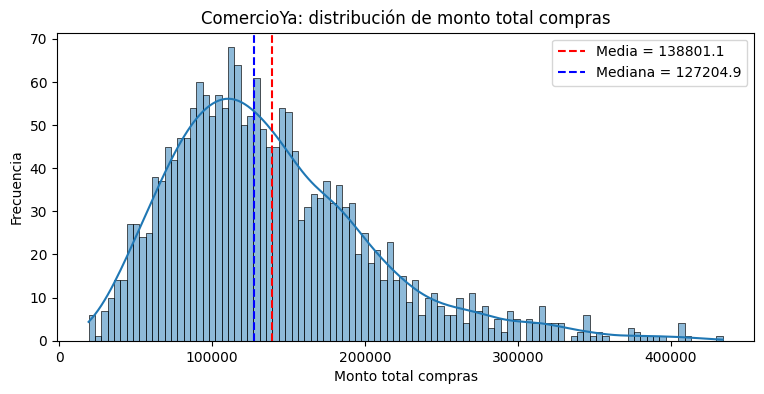

In [70]:
media_monto_total_compras= df["monto_total_compras"].mean()
moda_monto_total_compras= df["monto_total_compras"].mode()
mediana_monto_total_compras= df["monto_total_compras"].median()
varianza_monto_total_compras= df["monto_total_compras"].var()
desv_stand_monto_total_compras= df["monto_total_compras"].std()

print(f"N (sin nulos): {len(df['monto_total_compras'])}")
print(f"Media:   {media_monto_total_compras:.2f}")
print(f"Mediana: {mediana_monto_total_compras:.2f}")
print(f"Moda:    {moda_monto_total_compras.iloc[0] if not len(moda_monto_total_compras)==1963 else 'No hay moda'}")
print(f"Varianza: {varianza_monto_total_compras:.2f}")
print(f"Desv. estándar: {desv_stand_monto_total_compras:.2f}")
if len(moda_monto_total_compras) > 1:
    print(f"Nota: hay {len(moda_monto_total_compras)} modas.")


# Gráfico
plt.figure(figsize=(9,4))
sns.histplot(df["monto_total_compras"], bins=100, kde=True)
plt.axvline(media_monto_total_compras, color= "red", linestyle="--", label=f"Media = {media_monto_total_compras:.1f}")
plt.axvline(mediana_monto_total_compras, color= "blue", linestyle="--", label=f"Mediana = {mediana_monto_total_compras:.1f}")
plt.ticklabel_format(style='plain')
plt.xlabel("Monto total compras")
plt.ylabel("Frecuencia")
plt.title("ComercioYa: distribución de monto total compras")
plt.legend()
plt.show()

Se observa que la media (138.801) es mayor que la mediana (127.204), lo que indica que persiste asimetría positiva  hacia la derecha, esto es, existen valores altos que elevan el promedio, aunque la diferencia no es exagerada (de aprox. 11.600). Por otra parte, no existe moda, todos los datos son únicos, no hay concentración en ningún punto, esto se podría evaluar como algo típico ya que la variable es continua. En cuanto a la dispersión, la desviación estándar es de aprox. 66.653 (48% de la media) y la varianza 4442689240 (es un valor al cuadrado por eso es más alto), esto indica que existe una heterogeneidad moderada-alta, en términos sencillos el comportamiento de gasto de los clientes es variado, evidenciando que los montos no se concentran estrechamente en torno al promedio, sino que presentan una dispersión considerable dentro del rango observado.

In [71]:
# Medidas de posición
q1 = df["monto_total_compras"].quantile(0.25)
q2 = df["monto_total_compras"].quantile(0.50)  # mediana
q3 = df["monto_total_compras"].quantile(0.75)
p90 = df["monto_total_compras"].quantile(0.90)

print("\nMedidas de posición:")
print(f"Q1 (25%): {q1:.1f}")
print(f"Q2 (50% - mediana): {q2:.1f}")
print(f"Q3 (75%): {q3:.1f}")
print(f"Percentil 90: {p90:.1f}")


Medidas de posición:
Q1 (25%): 91158.5
Q2 (50% - mediana): 127204.9
Q3 (75%): 174624.7
Percentil 90: 224779.0


<b>Interpretación</b>           
• El 25% de los clientes gasta menos de 91.158. Esto indica que una cuarta parte de la muestra presenta niveles de gasto relativamente bajos respecto a la mediana.                 
• El 50% de los clientes gasta menos de 127.204. Este valor representa el “cliente típico” de alguna manera mejor que la media dado que no se ve afectado por valores altos.                         
• El 75% de los clientes gasta menos de 174.624 y solo el 25% supera este monto.                   
• El 90% de los clientes gasta menos de 224.779 y solo el 10% supera este nivel, lo que permite identificar el segmento de alto gasto.                

<Figure size 640x480 with 0 Axes>

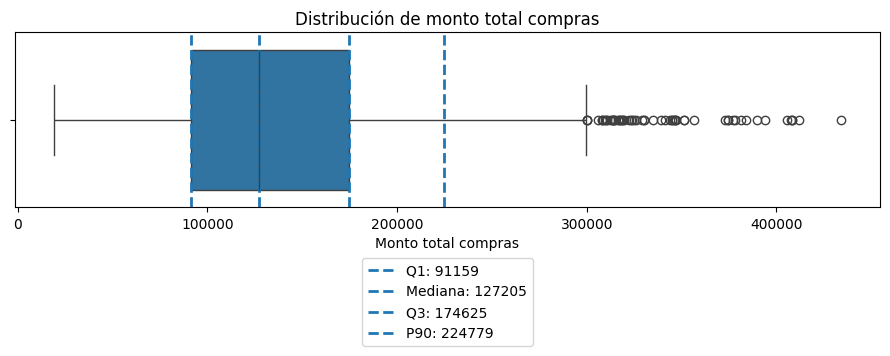

In [72]:
plt.figure()
plt.figure(figsize=(9, 4))
sns.boxplot(x=df["monto_total_compras"])
plt.title("Distribución de monto total compras")
plt.xlabel("Monto total compras")
plt.ticklabel_format(style='plain', axis='x')
for val, label in [(q1, "Q1"), (q2, "Mediana"), (q3, "Q3"), (p90, "P90")]:
    plt.axvline(val, linestyle="--", linewidth=2, label=f"{label}: {val:.0f}")
plt.legend(ncol=1, loc="upper center", bbox_to_anchor=(0.5, -0.25))
plt.tight_layout()
plt.show()

Las medidas de posición permiten profundizar en la estructura de la distribución. El rango intercuartílico (Q3-Q1 =83.466,2) indica que el 50% central de los clientes se concentra dentro de un rango de aproximadamente 83.466 unidades monetarias. La mayor amplitud observada entre la mediana y el tercer cuartil respecto al tramo inferior confirma una asimetría positiva moderada. Asimismo, el percentil 90 (224.779,0) evidencia la existencia de un segmento reducido de clientes con niveles de gasto significativamente superiores al promedio general. Graficamente ya se puede observar que existen outliers que pueden representar

In [74]:
# Seleccionar la variable
s = df["monto_total_compras"].dropna()

# Calcular cuartiles
q1 = s.quantile(0.25)
q3 = s.quantile(0.75)
iqr = q3 - q1

# Límites ajustados al sentido económico
lim_inf = max(0, q1 - 1.5 * iqr)
lim_sup = q3 + 1.5 * iqr

# Detectar outliers
outliers = s[(s < lim_inf) | (s > lim_sup)]

# Mostrar resultados
print("Resumen IQR - monto_total_compras")
print(f"N: {len(s)}")
print(f"Q1: {q1:.2f}")
print(f"Q3: {q3:.2f}")
print(f"IQR: {iqr:.2f}")
print(f"Límite inferior ajustado: {lim_inf:.2f}")
print(f"Límite superior: {lim_sup:.2f}")
print(f"Número de outliers: {len(outliers)}")
print(f"% de outliers: {len(outliers)/len(s)*100:.2f}%")

print("\nLista de outliers:")
print(outliers.sort_values().to_string())


Resumen IQR - monto_total_compras
N: 1963
Q1: 91158.54
Q3: 174624.65
IQR: 83466.11
Límite inferior ajustado: 0.00
Límite superior: 299823.83
Número de outliers: 60
% de outliers: 3.06%

Lista de outliers:
935    300034.29
1201   300068.81
1715   300081.50
1276   306057.59
1308   307864.40
1032   308139.42
1404   308367.62
918    309394.31
1334   309961.29
1871   310654.03
320    312109.01
528    313361.18
1587   313741.23
1368   313820.88
1509   313947.23
458    314271.25
204    315037.03
1263   316386.62
374    317062.58
1176   317314.59
1231   317950.62
767    318462.24
1673   319049.59
259    319533.44
927    322230.11
183    323468.69
1843   323850.70
1426   324914.07
285    326165.50
84     328914.02
672    330131.47
947    330152.90
192    335066.70
1765   339066.41
1603   341115.55
734    343665.71
1726   345069.71
1626   345074.80
607    345986.39
1705   346694.64
1335   346754.30
1960   346970.62
1080   351363.48
92     351365.43
699    356485.76
960    372800.24
1525   374339

El límite inferior teórico calculado mediante el método IQR resultó negativo. Sin embargo, dado que la variable representa montos monetarios, se ajustó a cero para mantener coherencia con el dominio de la variable.

La identificación de valores atípicos se realizó mediante el método del rango intercuartílico (IQR). Se determinó un límite superior de 299.824 unidades monetarias, por encima del cual los registros se clasifican como atípicos. Dado que el límite inferior resultó negativo y se ajustó a cero, no se identificaron outliers en el extremo inferior. Los valores superiores detectados se concentran en la cola derecha de la distribución, coherente con la asimetría positiva observada. Estos casos influyen principalmente en el incremento de la media y en la magnitud de la desviación estándar, aunque no necesariamente representan errores de registro, sino posibles comportamientos de alto gasto dentro del segmento analizado.

In [75]:
df_sin_outliers = df[df["monto_total_compras"] <= lim_sup]

print("Media original:", df["monto_total_compras"].mean())
print("Media sin outliers:", df_sin_outliers["monto_total_compras"].mean())

print("Desv. estándar original:", df["monto_total_compras"].std())
print("Desv. estándar sin outliers:", df_sin_outliers["monto_total_compras"].std())


Media original: 138801.11886697568
Media sin outliers: 132410.80362231706
Desv. estándar original: 66653.50134002381
Desv. estándar sin outliers: 56652.189375070615


Se identificaron 60 valores atípicos (3.06% del total) por encima del límite superior determinado mediante el método IQR. Al excluir estos registros, la media se redujo de 138.801 a 132410, mientras que la desviación estándar disminuyó de 66653 a 56652, evidenciando que los valores extremos influyen principalmente en las medidas paramétricas de dispersión. Pero que en este caso se deben dejar porque no necesariamente representan errores de registros sino que posibls comportamientos de clientes

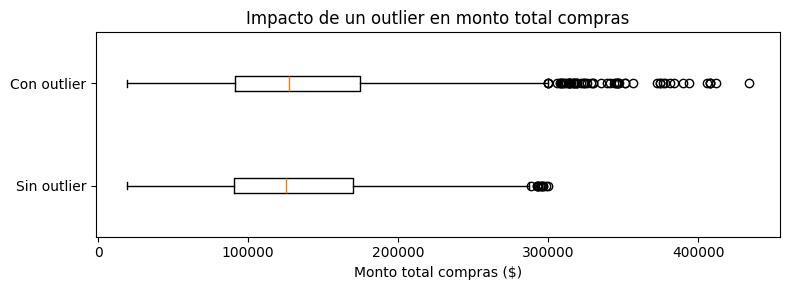

In [77]:
import matplotlib.pyplot as plt

# Variable original
s = df["monto_total_compras"].dropna()

# Calcular IQR
q1 = s.quantile(0.25)
q3 = s.quantile(0.75)
iqr = q3 - q1

lim_inf = max(0, q1 - 1.5 * iqr)
lim_sup = q3 + 1.5 * iqr

# Filtrar sin outliers
s_sin_outliers = s[(s >= lim_inf) & (s <= lim_sup)]

# Gráfica (boxplot comparativo)
plt.figure(figsize=(8, 3))
plt.boxplot([s_sin_outliers, s], vert=False, tick_labels=["Sin outlier", "Con outlier"])
plt.title("Impacto de un outlier en monto total compras")
plt.xlabel("Monto total compras ($)")
plt.tight_layout()
plt.show()

Outliers de todos 

In [93]:
# 1️⃣ Lista de variables numéricas relevantes
variables_numericas = [
    "edad",
    "visitas_web",
    "tiempo_en_web_min",
    "numero_compras",
    "monto_total_compras",
    "descuento_promedio",
    "numero_devoluciones",
    "puntuacion_resena"
]

# 2️⃣ Función para calcular IQR y detectar outliers
def iqr_outliers(s):
    q1 = s.quantile(0.25)
    q3 = s.quantile(0.75)
    iqr = q3 - q1
    lim_inf = q1 - 1.5 * iqr
    lim_sup = q3 + 1.5 * iqr
    out = s[(s < lim_inf) | (s > lim_sup)]
    return q1, q3, iqr, lim_inf, lim_sup, out

resumen = []
outliers_dict = {}

# 3️⃣ Aplicar solo a variables numéricas definidas
for col in variables_numericas:
    s = df[col].dropna()
    q1, q3, iqr, lim_inf, lim_sup, out = iqr_outliers(s)
    outliers_dict[col] = out

    resumen.append({
        "variable": col,
        "n": len(s),
        "Q1": q1,
        "Q3": q3,
        "IQR": iqr,
        "lim_inf": lim_inf,
        "lim_sup": lim_sup,
        "n_outliers": len(out),
        "%_outliers": round(len(out)/len(s)*100, 2),
        "media": s.mean(),
        "mediana": s.median(),
        "desv_std": s.std(ddof=1)
    })

tabla_resumen = pd.DataFrame(resumen).sort_values("%_outliers", ascending=False)

print("Resumen de detección de outliers (ordenado por % de outliers):")
print(tabla_resumen.round(2).to_string(index=False))

print("\nOutliers detectados por variable:")
for col, out in outliers_dict.items():
    if out.empty:
        print(f"- {col}: no hay outliers")
    else:
        print(f"- {col}: {len(out)} detectados")


Resumen de detección de outliers (ordenado por % de outliers):
           variable    n       Q1        Q3      IQR   lim_inf   lim_sup  n_outliers  %_outliers     media   mediana  desv_std
  puntuacion_resena 1963     3.00      4.00     1.00      1.50      5.50         110        5.60      3.69      4.00      1.11
monto_total_compras 1963 91158.54 174624.65 83466.11 -34040.63 299823.83          60        3.06 138801.12 127204.94  66653.50
numero_devoluciones 1963     0.00      1.00     1.00     -1.50      2.50          48        2.45      0.61      0.00      0.82
     numero_compras 1963     4.00      7.00     3.00     -0.50     11.50          36        1.83      6.04      6.00      2.21
               edad 1963    26.00     43.00    17.00      0.50     68.50          10        0.51     34.85     35.00     12.36
  tiempo_en_web_min 1963    14.58     25.79    11.21     -2.24     42.61           6        0.31     20.23     20.30      8.14
        visitas_web 1963    12.00     18.00     

In [85]:
resumen_central = (
    df.groupby("tipo_cliente")["monto_total_compras"]
      .agg(
          media="mean",
          mediana="median",
          minimo="min",
          maximo="max",
          rango=lambda x: x.max() - x.min(),
          varianza="var",
          desv_std="std"
      )
)

resumen_central = resumen_central.round(2)

print(resumen_central)


                 media   mediana   minimo    maximo     rango      varianza  \
tipo_cliente                                                                  
Nuevo        139596.01 127275.17 19186.88 433878.83 414691.94 4380349210.34   
Premium      139868.02 129899.80 21561.71 412101.46 390539.75 4663232790.98   
Recurrente   137737.45 125223.19 22092.99 408195.70 386102.72 4434254661.05   

              desv_std  
tipo_cliente            
Nuevo         66184.21  
Premium       68287.87  
Recurrente    66590.20  


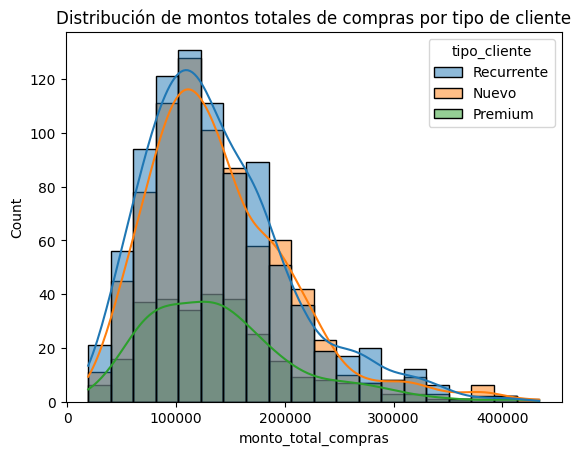

In [91]:
plt.figure()
sns.histplot(data=df, x="monto_total_compras", hue="tipo_cliente", bins=20, kde=True)
plt.title("Distribución de montos totales de compras por tipo de cliente")
plt.show()

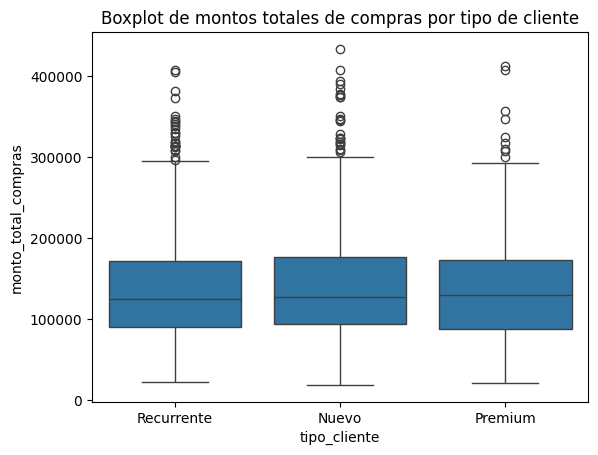

In [92]:
plt.figure()
sns.boxplot(data=df, x="tipo_cliente", y="monto_total_compras")
plt.title("Boxplot de montos totales de compras por tipo de cliente")
plt.show()

<b>Lección 3: CORRELACIÓN</b>              
<font color="red"> Detectar y cuantiﬁcar relaciones entre variables numéricas </font>

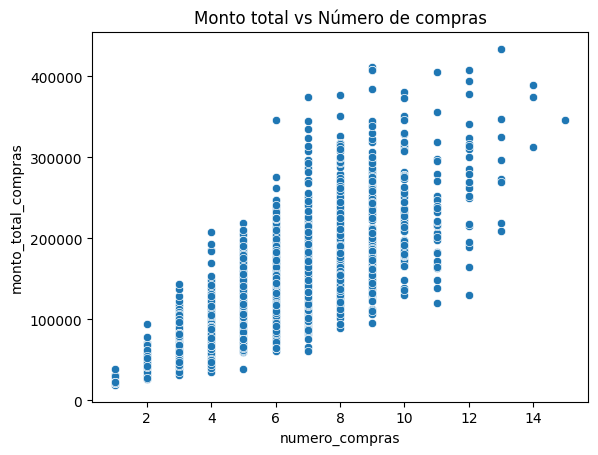

In [95]:
plt.figure()
sns.scatterplot(data=df, x="numero_compras", y="monto_total_compras")
plt.title("Monto total vs Número de compras")
plt.show()
